**fbprophet is a time series forecasting library developed by Facebook. It's particularly helpful for forecasting time series data that has strong seasonal effects and historical data with irregularities or missing values. It's used because it's relatively easy to use and provides good results for many business time series.**

In [ ]:
!pip install fbprophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 58.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/NammaMetro_Ridership_Dataset.csv")

In [ ]:
df

,Record Date,Total Smart Cards,Stored Value Card,One Day Pass,Three Day Pass,Five Day Pass,Total Tokens,Total NCMC,Group Ticket,Total QR,QR NammaMetro,QR WhatsApp,QR Paytm
0,26-10-2024,353460,352496,853,43,68,241883,7444,512,177279,49351,95571,32357
1,27-10-2024,176278,175195,971,75,37,250124,4278,458,205910,56321,111959,37630
2,28-10-2024,452257,451688,405,107,57,208014,11076,160,177629,49051,94150,34428
3,29-10-2024,452299,451672,471,115,41,205421,10948,407,182210,53315,94739,34156
4,30-10-2024,425759,425115,494,104,46,233366,9975,198,201583,51942,111291,38350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,15-07-2025,458422,457702,152,22,546,186107,23478,0,157914,44017,85503,28394
204,16-07-2025,456504,455761,172,32,539,190503,23626,499,161315,45023,87628,28664
205,17-07-2025,447487,446768,147,45,527,188748,23503,475,158926,44234,85932,28760
206,18-07-2025,428303,427485,232,23,563,198721,22699,467,179181,49001,98752,31428


The dataset contains daily ridership information for the Namma Metro. Here's a breakdown of the columns:

Record Date: The date for which the ridership data is recorded.

Total Smart Cards: The total number of smart cards used on that day.

Stored Value Card: The number of rides taken using stored value on smart cards.

One Day Pass: The number of one-day passes used.

Three Day Pass: The number of three-day passes used.

Five Day Pass: The number of five-day passes used.

Total Tokens: The total number of tokens used.

Total NCMC: The total number of National Common Mobility Card (NCMC) transactions.

Group Ticket: The number of group tickets purchased.

Total QR: The total number of QR code-based entries.

QR NammaMetro: The number of QR entries using the Namma Metro app.

QR WhatsApp: The number of QR entries using WhatsApp.

QR Paytm: The number of QR entries using Paytm.


This dataset acts as a daily ledger for Namma Metro's revenue and passenger flow. By analyzing these numbers, we can answer critical business questions like:

Are more people choosing digital payments over traditional tokens?

Which payment method is the most popular, and which is the least?

How do ridership numbers fluctuate from day to day and month to month?

What is the overall trend of ridership growth for the entire metro network?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   208 non-null    datetime64[ns]
 1   Total Smart Cards      208 non-null    int64         
 2   Stored Value Card      208 non-null    int64         
 3   One Day Pass           208 non-null    int64         
 4   Three Day Pass         208 non-null    int64         
 5   Five Day Pass          208 non-null    int64         
 6   Total Tokens           208 non-null    int64         
 7   Total NCMC             208 non-null    int64         
 8   Group Ticket           208 non-null    int64         
 9   Total QR               208 non-null    int64         
 10  QR NammaMetro          208 non-null    int64         
 11  QR WhatsApp            208 non-null    int64         
 12  QR Paytm               208 non-null    int64         
 13  Total

In [ ]:
df.head()

,Record Date,Total Smart Cards,Stored Value Card,One Day Pass,Three Day Pass,Five Day Pass,Total Tokens,Total NCMC,Group Ticket,Total QR,QR NammaMetro,QR WhatsApp,QR Paytm
0,26-10-2024,353460,352496,853,43,68,241883,7444,512,177279,49351,95571,32357
1,27-10-2024,176278,175195,971,75,37,250124,4278,458,205910,56321,111959,37630
2,28-10-2024,452257,451688,405,107,57,208014,11076,160,177629,49051,94150,34428
3,29-10-2024,452299,451672,471,115,41,205421,10948,407,182210,53315,94739,34156
4,30-10-2024,425759,425115,494,104,46,233366,9975,198,201583,51942,111291,38350


In [ ]:
df.columns

Index(['Record Date', 'Total Smart Cards', 'Stored Value Card', 'One Day Pass',
       'Three Day Pass', 'Five Day Pass', 'Total Tokens', 'Total NCMC',
       'Group Ticket', 'Total QR', 'QR NammaMetro', 'QR WhatsApp', 'QR Paytm'],
      dtype='object')

In [ ]:
print(f"Total rows: {len(df)}")


Total rows: 208


#  Phase 2: Data Cleaning and Feature Engineering

In [ ]:
df.describe()

,Total Smart Cards,Stored Value Card,One Day Pass,Three Day Pass,Five Day Pass,Total Tokens,Total NCMC,Group Ticket,Total QR,QR NammaMetro,QR WhatsApp,QR Paytm
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,376607.543269,375794.182692,448.548077,76.865385,287.947115,210788.634615,12917.466346,391.807692,179335.028846,49010.216346,96755.687500,33553.057692
std,111270.825993,111273.635372,306.523183,91.228392,197.808139,30412.780753,5193.606083,296.835112,27708.006188,8831.951829,16474.914638,5701.032023
min,96209.000000,95682.000000,79.000000,1.000000,12.000000,84841.000000,2714.000000,0.000000,12903.000000,1081.000000,6671.000000,2285.000000
25%,305667.250000,304317.500000,201.500000,30.000000,94.500000,193342.250000,9460.250000,159.000000,164222.750000,45683.250000,87912.000000,30178.000000
50%,424501.500000,423805.500000,388.500000,54.000000,238.000000,206344.500000,12132.500000,319.500000,178274.000000,49792.500000,95205.000000,32719.500000
75%,455779.750000,455032.000000,582.500000,87.250000,504.000000,224554.750000,16625.750000,521.250000,191754.500000,52577.250000,103995.750000,36154.250000
max,631442.000000,630315.000000,1762.000000,639.000000,655.000000,349701.000000,23626.000000,1625.000000,264937.000000,69323.000000,146837.000000,59321.000000


In [ ]:
# Renaming the date column for clarity
df.rename(columns={'Record Date':'Date'},inplace=True)

In [ ]:
df.columns

Index(['Date', 'Total Smart Cards', 'Stored Value Card', 'One Day Pass',
       'Three Day Pass', 'Five Day Pass', 'Total Tokens', 'Total NCMC',
       'Group Ticket', 'Total QR', 'QR NammaMetro', 'QR WhatsApp', 'QR Paytm'],
      dtype='object')

In [ ]:
# Converting the date column to a proper datetime format
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [ ]:
#Identifying ridership columns and calculate the total daily ridership
ridership_cols = [col for col in df.columns if 'Day' in col or 'Card' in col or 'Tokens' in col or 'QR' in col or 'Ticket' in col or 'NCMC' in col]
df['Total_Daily_Ridership'] = df[ridership_cols].sum(axis=1)
df.head()

,Date,Total Smart Cards,Stored Value Card,One Day Pass,Three Day Pass,Five Day Pass,Total Tokens,Total NCMC,Group Ticket,Total QR,QR NammaMetro,QR WhatsApp,QR Paytm,Total_Daily_Ridership
0,2024-10-26,353460,352496,853,43,68,241883,7444,512,177279,49351,95571,32357,1311317
1,2024-10-27,176278,175195,971,75,37,250124,4278,458,205910,56321,111959,37630,1019236
2,2024-10-28,452257,451688,405,107,57,208014,11076,160,177629,49051,94150,34428,1479022
3,2024-10-29,452299,451672,471,115,41,205421,10948,407,182210,53315,94739,34156,1485794
4,2024-10-30,425759,425115,494,104,46,233366,9975,198,201583,51942,111291,38350,1498223


This code snippet identifies columns related to ridership and calculates the total daily ridership:

1.  **`ridership_cols = [col for col in df.columns if 'Day' in col or 'Card' in col or 'Tokens' in col or 'QR' in col or 'Ticket' in col or 'NCMC' in col]`**: This line creates a list called `ridership_cols`. It iterates through all the column names in the DataFrame `df` and includes a column in the list if its name contains any of the specified keywords ('Day', 'Card', 'Tokens', 'QR', 'Ticket', or 'NCMC'). This is a way to automatically select all columns that represent different forms of ridership.
2.  **`df['Total_Daily_Ridership'] = df[ridership_cols].sum(axis=1)`**: This line calculates the sum of the values in the columns identified in `ridership_cols` for each row (axis=1) and creates a new column in the DataFrame called `Total_Daily_Ridership` to store these sums. This gives you the total number of riders for each day by adding up all the different ticket and payment types.

In essence, this code is aggregating all the different ways people pay for or use the metro into a single 'Total\_Daily\_Ridership' figure for each day.

In [ ]:
#Creating new features (e.g., day of the week, weekend, etc.)
df['Day_of_week']=df['Date'].dt.day_name()
df['is weekend']=df['Day_of_week'].isin(['Saturday','Sunday'])
df['Month_Year'] = df['Date'].dt.to_period('M')

In [ ]:
print(df[['Date', 'Total_Daily_Ridership', 'Day_of_week', 'is weekend']].head())

        Date  Total_Daily_Ridership Day_of_week  is weekend
0 2024-10-26                1311317    Saturday        True
1 2024-10-27                1019236      Sunday        True
2 2024-10-28                1479022      Monday       False
3 2024-10-29                1485794     Tuesday       False
4 2024-10-30                1498223   Wednesday       False



# Phase 3: Data Analysis and Visualizations

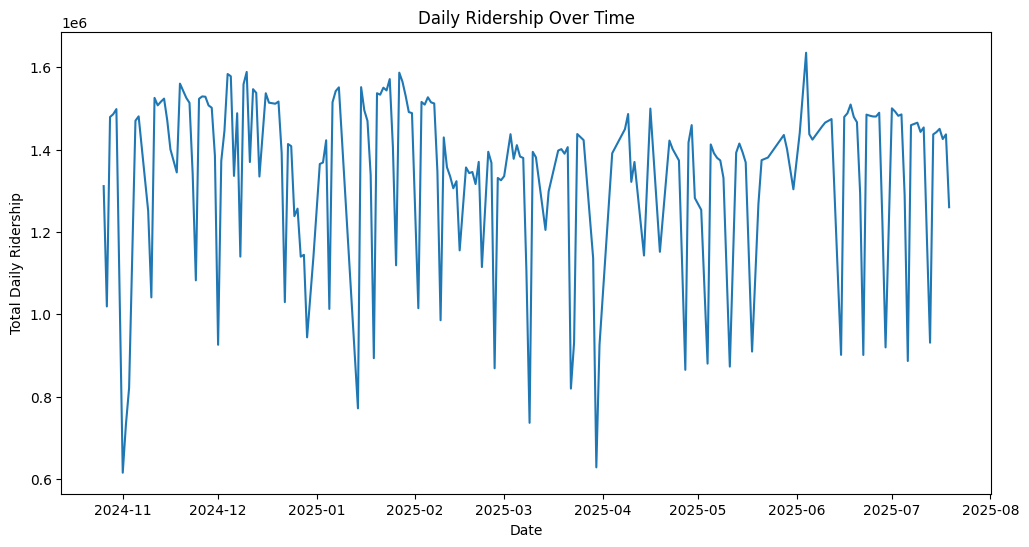

In [ ]:
# Graph showing the daily ridership trend
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Date',y='Total_Daily_Ridership')
plt.title('Daily Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Total Daily Ridership')
plt.show()

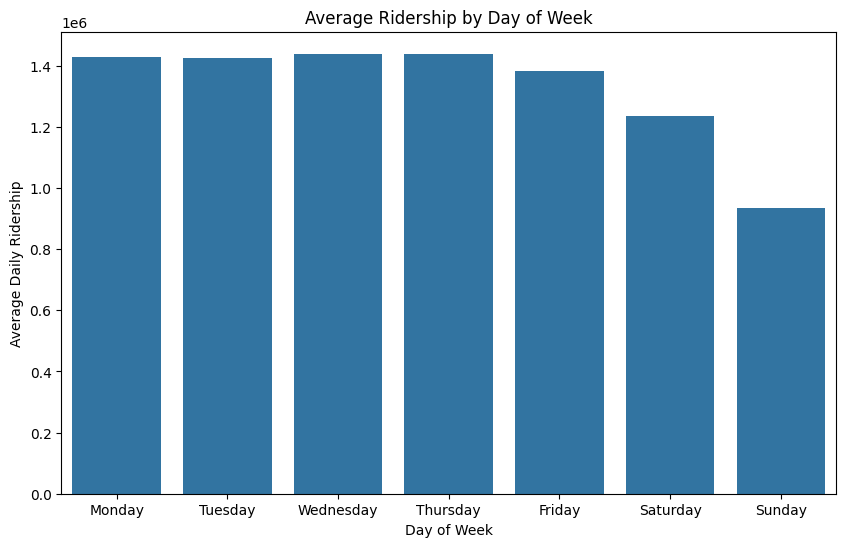

In [ ]:
# Average ridership by day of the week
avg_ridership_day = df.groupby('Day_of_week')['Total_Daily_Ridership'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ridership_day.index, y=avg_ridership_day.values)
plt.title('Average Ridership by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Daily Ridership')
plt.show()

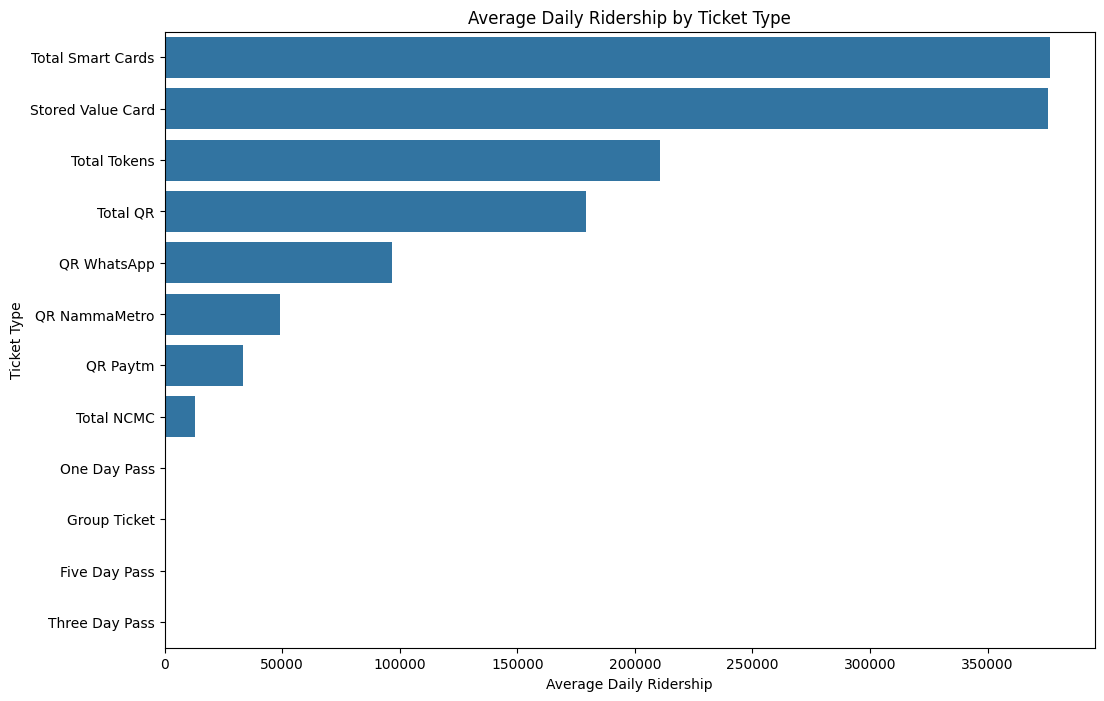

In [ ]:
# Average ridership by ticket type
df_melted = df.melt(id_vars=['Date'], value_vars=ridership_cols, var_name='Ticket_Type', value_name='Ridership')
avg_ridership_ticket = df_melted.groupby('Ticket_Type')['Ridership'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_ridership_ticket.values, y=avg_ridership_ticket.index)
plt.title('Average Daily Ridership by Ticket Type')
plt.xlabel('Average Daily Ridership')
plt.ylabel('Ticket Type')
plt.show()

This code snippet calculates the average daily ridership for each ticket type and then visualizes the results:

1.  **`df_melted = df.melt(id_vars=['Date'], value_vars=ridership_cols, var_name='Ticket_Type', value_name='Ridership')`**: This line uses the `melt()` function to transform the DataFrame from a wide format to a long format. It keeps the 'Date' column as the identifier (`id_vars`), takes the `ridership_cols` as the columns to unpivot (`value_vars`), names the new column containing the original column headers 'Ticket\_Type' (`var_name`), and names the new column containing the values 'Ridership' (`value_name`). This makes it easier to group and analyze ridership by ticket type.
2.  **`avg_ridership_ticket = df_melted.groupby('Ticket_Type')['Ridership'].mean().sort_values(ascending=False)`**: This line groups the melted DataFrame by 'Ticket\_Type', calculates the mean 'Ridership' for each ticket type, and then sorts the results in descending order so the ticket type with the highest average ridership appears first.
3.  **`plt.figure(figsize=(12, 8))`**: This creates a new figure for the plot with a specified size.
4.  **`sns.barplot(x=avg_ridership_ticket.values, y=avg_ridership_ticket.index)`**: This creates a bar plot using Seaborn. The average ridership values are used for the x-axis, and the ticket types are used for the y-axis.
5.  **`plt.title('Average Daily Ridership by Ticket Type')`**: This sets the title of the bar plot.
6.  **`plt.xlabel('Average Daily Ridership')`**: This sets the label for the x-axis.
7.  **`plt.ylabel('Ticket Type')`**: This sets the label for the y-axis.
8.  **`plt.show()`**: This displays the generated bar plot.

In summary, this code prepares the data to compare the average ridership across different ticket types and then visualizes this comparison with a bar plot.

In [ ]:
# Interactive graph showing the ridership trend by ticket type
import plotly.express as px
fig = px.line(df_melted, x='Date', y='Ridership', color='Ticket_Type', title='Daily Ridership Trend by Ticket Type (Interactive)')
fig.show()


# Phase 4: Ridership Forecasting

In [ ]:
from prophet import Prophet
# Prepare data for Prophet: format to 'ds' and 'y'
df_prophet = df[['Date', 'Total_Daily_Ridership']].copy()
df_prophet.rename(columns={'Date': 'ds', 'Total_Daily_Ridership': 'y'}, inplace=True)

In [ ]:
# Create and fit the Prophet model
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsytdt2aw/v6y2vz2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsytdt2aw/ie2iy3cp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41884', 'data', 'file=/tmp/tmpsytdt2aw/v6y2vz2e.json', 'init=/tmp/tmpsytdt2aw/ie2iy3cp.json', 'output', 'file=/tmp/tmpsytdt2aw/prophet_modeloirj2psp/prophet_model-20250725112135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:21:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:21:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Forecast for the next 90 days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

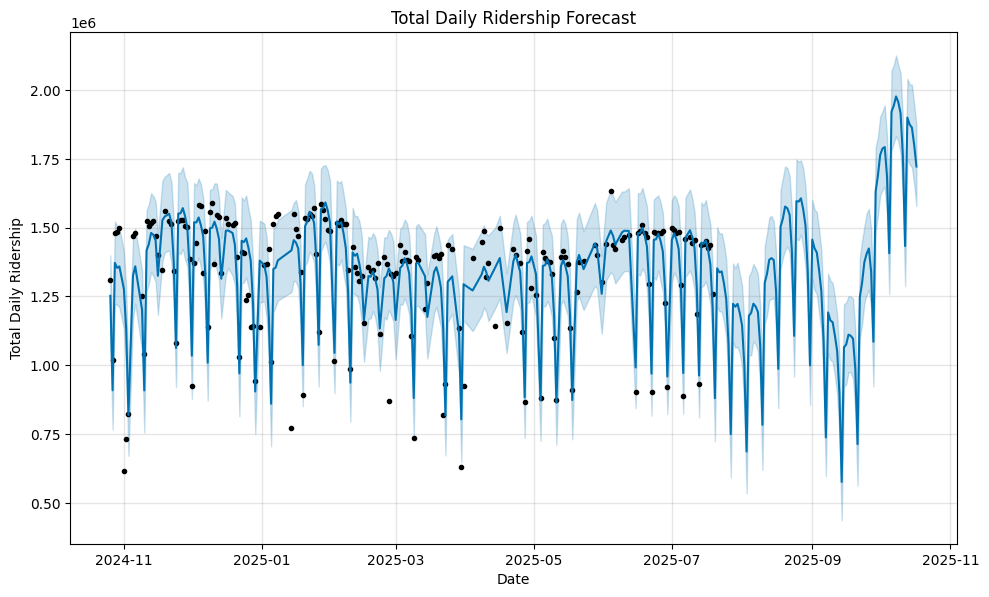

In [ ]:
# Show the forecasted data graph
fig_forecast = model.plot(forecast)
plt.title('Total Daily Ridership Forecast')
plt.xlabel('Date')
plt.ylabel('Total Daily Ridership')
plt.show()



The chart you see is a visualization of the total daily ridership forecast generated by the Prophet model. Here's what the different parts represent:

*   **Black dots**: These represent the actual historical daily ridership data points that were used to train the model.
*   **Blue line**: This is the forecast line, which shows the model's prediction for the total daily ridership in the future.
*   **Light blue shaded area**: This represents the uncertainty interval around the forecast. It shows the range within which the actual ridership is likely to fall, based on the model's confidence. As you look further into the future, this shaded area typically gets wider, reflecting increased uncertainty in the forecast.
*   **X-axis**: This represents the date.
*   **Y-axis**: This represents the total daily ridership.

This chart allows you to see the historical trend and how the model predicts ridership will behave in the future, including the expected variations and the level of uncertainty in the prediction.

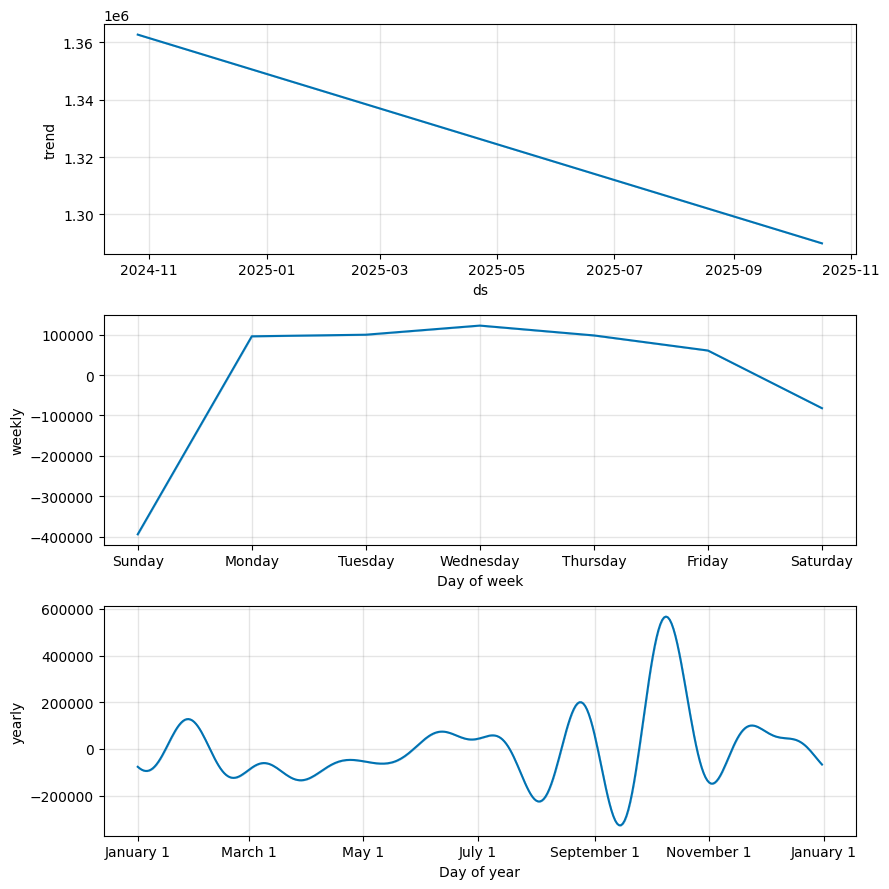

In [ ]:
# Show the components of the forecast (trend, weekly, yearly seasonality)
fig_components = model.plot_components(forecast)
plt.show()

Okay, let's break down the components graph. This graph isn't just one graph, but several smaller graphs put together, showing you the different pieces that the Prophet model used to build its forecast.

Think of the total ridership forecast as being made up of a few different things added together:

1.  **The Trend Graph (Top Graph)**: This graph shows the overall direction of the ridership over the entire time period, ignoring the ups and downs that happen every week or every year. It tells you if ridership is generally increasing, decreasing, or staying about the same over the long run.
2.  **The Weekly Seasonality Graph (Middle Graph)**: This graph shows a typical week's pattern. It tells you, on average, how much ridership goes up or down on each day of the week compared to the average day. For example, you might see peaks on weekdays and dips on weekends.
3.  **The Yearly Seasonality Graph (Bottom Graph)**: This graph shows a typical year's pattern. It tells you, on average, how much ridership goes up or down during different times of the year (like in certain months) compared to the yearly average. This can capture things like holiday effects or changes due to weather.

So, instead of just seeing the final prediction, these graphs let you see *why* the prediction is what it is, by showing you the long-term trend and the regular weekly and yearly patterns that the model found in your data.